I utilize a list of customers who use the services provided by Telcom ABC for the training dataset. This dataset comprises ten thousand samples, and my goal is to identify patterns of internet usage behavior exhibited by consumers who have churned. These trends can be a reference point for developing predictions about customer attrition for other clients.

In [1]:
import pandas as pd
df = pd.read_csv("http://buku.dioskurn.com/buku1/ch9/churnprediction_ch9.csv", sep=',', index_col = ["customer_id"])
card = {"Kartu A": "Card A", "Kartu B" : "Card B", "Kartu C" : "Card C"}
df["product"].replace(card, inplace = True)
df.head()

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Card A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Card A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Card A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Card A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Card A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


In the churn column, a value of 1 indicates that a customer has stopped subscribing, whereas a value of 0 indicates that the customer is still actively subscribed.

Detail feature:
- customer_id : Customer number (code). This is used as index.
- product : Card product trademark used.
- reload_1 : Top up 1 month ago (in Rupiah).
- reload_2 : Top up 2 months ago (in Rupiah).
- video : Average video application usage per month (in Rupiah).
- music : Average music application usage per month (in Rupiah).
- games : Average games application usage per month (in Rupiah).
- chat_1 : Use of online chat 1 month ago (in Rupiah).
- chat_2 : Use of online chat 2 months ago (in Rupiah).
- socmed_1 : Use of social media 1 month ago (in Rupiah).
- socmed_2 : Use of social media 2 months ago (in Rupiah).
- internet : Total internet usage 1 month ago (in Rupiah).
- days_active : Number of active days using the service in the last month.
- tenure : How long have you been a customer (in days).
- churn : "0" if the customer is still active, "1" if the customer is no longer a customer. This is used as the target/predictive label.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 285fae8412c4720a0c79d95f98434422 to 2c5bc32bc9a9c393d393bfc11c409b0d
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      10000 non-null  object 
 1   reload_1     10000 non-null  float64
 2   reload_2     10000 non-null  float64
 3   video        10000 non-null  float64
 4   music        10000 non-null  float64
 5   games        10000 non-null  float64
 6   chat_1       10000 non-null  float64
 7   chat_2       10000 non-null  float64
 8   socmed_1     10000 non-null  float64
 9   socmed_2     10000 non-null  float64
 10  internet     10000 non-null  float64
 11  days_active  10000 non-null  int64  
 12  tenure       10000 non-null  int64  
 13  churn        10000 non-null  int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 1.1+ MB


There may be shown to be 10,000 subscribers. Because active customers and halted customers are still intermingled, I created a pie chart to compare the two groups visually. Earlier, I counted the number of subscribers for each variable in the feature churn using the count() aggregate method.

In [3]:
df_Churn = df.groupby("churn").count()
df_Churn

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure
churn,,,,,,,,,,,,,
0,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000
1,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


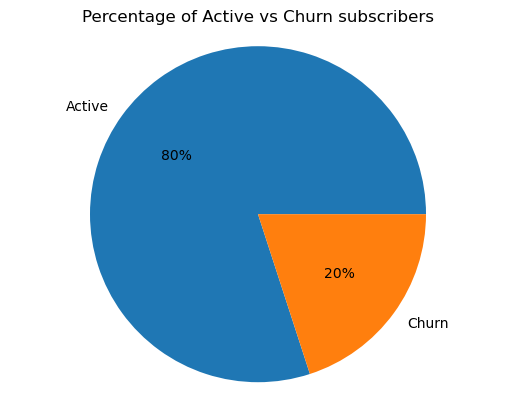

In [4]:
import matplotlib.pyplot as plt
plt.pie(df_Churn["product"], labels=["Active","Churn"], autopct="%1.0f%%")
plt.title("Percentage of Active vs Churn subscribers")
plt.axis("equal")
plt.show()

In [5]:
df["product"].value_counts()

Card C    7548
Card B    1679
Card A     773
Name: product, dtype: int64

This feature needs to be converted into numeric form as soon as possible because it still contains product names written out in text form. The one-hot encoding method is the one that is used the most frequently. This method involves writing down all of the possible values in a column and then assigning values 0 and 1 to those possible values in the column depending on whether the customer represented in each row uses the product in question or not.

In [6]:
pd.get_dummies(df["product"])

,Card A,Card B,Card C
customer_id,,,
285fae8412c4720a0c79d95f98434422,1,0,0
f45bce87ca6bf100f222fcc0db06b624,1,0,0
09b54557b1e2a10d998e3473a9ccd2a0,1,0,0
11f252f48be36f93dd429f2ec86cb2f5,1,0,0
a8df29ae9195eea348d2f74c967b978d,1,0,0
...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,0,1,0
a310627191bdbded3905ac73e77fe319,0,1,0
b6f11059e5c1df69b8c16d5c39af23dc,0,1,0


Next, we combine the three columns and store them in a new variable.

In [7]:
df1 = pd.concat([df, pd.get_dummies(df["product"])], axis = 1, sort = False)
df1.drop(["product"], axis = 1, inplace = True)
df1

,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn,Card A,Card B,Card C
customer_id,,,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0,1,0,0
f45bce87ca6bf100f222fcc0db06b624,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0,1,0,0
09b54557b1e2a10d998e3473a9ccd2a0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0,1,0,0
11f252f48be36f93dd429f2ec86cb2f5,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0,1,0,0
a8df29ae9195eea348d2f74c967b978d,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1,0,1,0
a310627191bdbded3905ac73e77fe319,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1,0,1,0
b6f11059e5c1df69b8c16d5c39af23dc,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1,0,1,0


While training the model, only some of the dataset's features will be helpful. Because of this, we need to select the characteristics that will assist the model in accommodating more data, referred to as feature selection.
This time, we select features using Pearson Correlation, which measures the closeness of the association between two variables. Because the influence of the two variables' proximity on the correctness of the model will be substantially equivalent, the closer the two variables are to one another. Because of this, we can choose only one of the two variables to utilize as a feature.

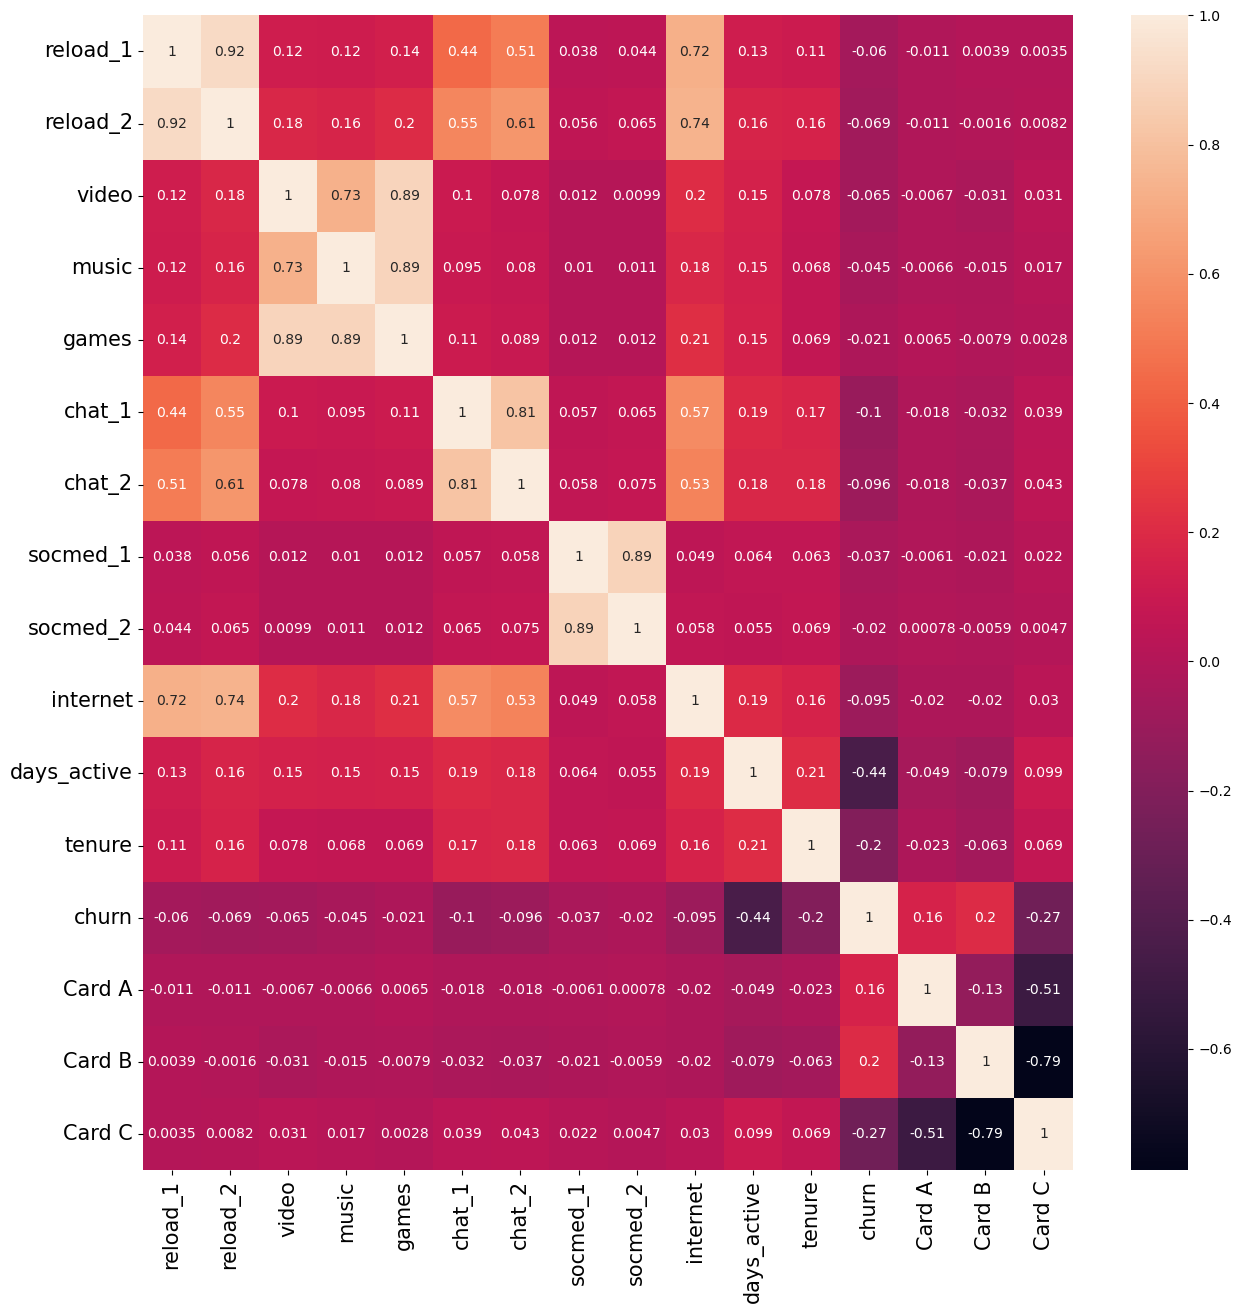

In [8]:
import seaborn as sns
df_corr = df1.corr()
sns.heatmap(df_corr, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values, annot = True, annot_kws = {'size': 10})
heat_map = plt.gcf()
heat_map.set_size_inches(15,15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Based on the preceding heatmap, we know that only one of the features, "reload_1" or "reload_2," should be used during training because their correlation is relatively high (0.92). Also, "socmed 1" and "socmed 2" are highly correlated, so we can safely discard one of them. Similarly, the feature separated the features "music" and "games."
In the feature mentioned earlier selection procedure, "reload_2," "socmed_2," and "games" will be eliminated from further consideration in the training phase.

In [9]:
X = df1.drop(["reload_2","socmed_2","games","churn"], axis = 1, inplace = False)
y = df1["churn"]

In [10]:
#split dataset
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# feature scailing
import sklearn.preprocessing as pp
scl = pp.StandardScaler(copy = True, with_mean = True, with_std = True)
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

In [12]:
X_train

array([[-0.01291083, -0.16839689, -0.17600903, ..., -0.2913638 ,
        -0.44915757,  0.57138416],
       [ 0.02058001, -0.16839689,  3.23036363, ...,  3.4321353 ,
        -0.44915757, -1.75013603],
       [-0.12512636, -0.16839689, -0.17600903, ..., -0.2913638 ,
        -0.44915757,  0.57138416],
       ...,
       [-0.13437944, -0.16839689, -0.17600903, ..., -0.2913638 ,
        -0.44915757,  0.57138416],
       [-0.1210975 , -0.16839689, -0.17600903, ..., -0.2913638 ,
         2.22639015, -1.75013603],
       [-0.13437944, -0.16839689, -0.17600903, ..., -0.2913638 ,
         2.22639015, -1.75013603]])

In [13]:
X_test

array([[-0.00405091, -0.16839689, -0.17600903, ...,  3.4321353 ,
        -0.44915757, -1.75013603],
       [-0.13437944, -0.16839689, -0.17600903, ..., -0.2913638 ,
        -0.44915757,  0.57138416],
       [-0.13437944, -0.16839689, -0.17600903, ..., -0.2913638 ,
        -0.44915757,  0.57138416],
       ...,
       [-0.12654487, -0.16839689, -0.17600903, ...,  3.4321353 ,
        -0.44915757, -1.75013603],
       [-0.13437944, -0.16839689, -0.17600903, ..., -0.2913638 ,
         2.22639015, -1.75013603],
       [-0.13437944, -0.16839689, -0.17600903, ..., -0.2913638 ,
        -0.44915757,  0.57138416]])

**Traing the Model**

As the first stage in carrying out Churn Prediction, namely Logistic Regression.

In [14]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as met
model = lm.LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_predict = model.predict(X_test)
print(y_predict)

[1 0 0 ... 0 0 0]


In [16]:
score = met.accuracy_score(y_test, y_predict)
print("Accuracy =", score)

Accuracy = 0.831


In [17]:
precision = met.precision_score(y_test, y_predict)
print("Precision =", precision)

Precision = 0.6608695652173913


In [18]:
recall = met.recall_score(y_test, y_predict)
print("Recall =", recall)

Recall = 0.36893203883495146


In [19]:
auc = met.roc_auc_score(y_test, y_predict)
print("AUC =", auc)

AUC = 0.6599068254628158


According to the data presented above, the model has an accuracy of 83.1%. It is impossible to conclude the accuracy value alone; precision and recall are also required. As a result of our research, we know that the percentage of customers who opt out is much lower than that of loyal ones.

In an effort to find the best predictive model, we can try another algorithm, namely the Random Forest.

In [20]:
import sklearn.ensemble as ens
import sklearn.metrics as met
model = ens.RandomForestClassifier(n_estimators = 200, random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [21]:
y_predict = model.predict(X_test)
print(y_predict)

[1 0 0 ... 1 0 0]


In [22]:
score = met.accuracy_score(y_test, y_predict)
print("Accuracy =", score)

Accuracy = 0.93


In [23]:
precision = met.precision_score(y_test, y_predict)
print("Precision =", precision)

Precision = 0.8541666666666666


In [24]:
recall = met.recall_score(y_test, y_predict)
print("Recall =", recall)

Recall = 0.7961165048543689


In [25]:
auc = met.roc_auc_score(y_test, y_predict)
print("AUC =", auc)

AUC = 0.8804260106135825


The Random Forest model shows a considerable boost in accuracy (to 93%) and recall and precision (to significantly higher levels). The question "What are the signals that suggest a client is likely to churn?" can also be answered using this prediction model. To determine this, we can consult the model's feature importance attribute, shown as a bar chart, and provide a ranking of the top 10 features influencing churn.

<AxesSubplot:>

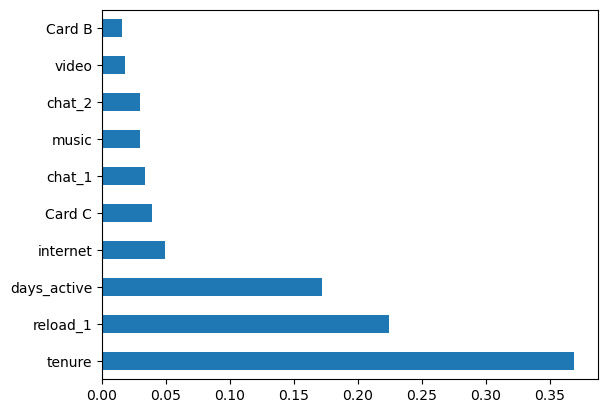

In [26]:
feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.nlargest(10).plot(kind="barh")

The information above suggests that there are three factors that influence a customer's decision to cancel their subscription: 
- "Tenure" : Duration of the customer's status as a repeat buyer
- "days_active" : Amount of Time Spent Using the Service, or Active Days
- "reload_1" : Quantity of times a user reloads their account with money.

The next challenge is applying this model to larger data sets to score all ABC Telkom customers so that ABC Telkom can update the list of promotion program targets daily. This is known as productionization, which brings machine learning models that have been trained into the production environment and used for business activities.

The model mentioned above is constructed using a 10,000-sample training dataset. The model must preserve the model before the model can use with all of the customers, who could number in the millions. To do so, we require a python package called Joblib, which allows Joblb to dump objects from memory to disk.

In [30]:
import joblib
joblib.dump(model, "Churn_Predicition.sav")

['Churn_Predicition.sav']